In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'


In [7]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [8]:
classLabels =[]
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [9]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
print(len(classLabels))

80


In [11]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001365F9936D0>

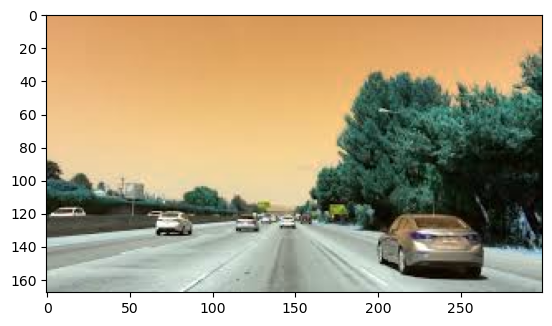

In [12]:
img = cv2.imread('images.jpg')
plt.imshow(img)

In [13]:
ClassIndex, confidece, bbox= model.detect(img, confThreshold= 0.5)

In [14]:
print(ClassIndex)

[3 3 3 3 3 3 3 3]


In [15]:
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=1)

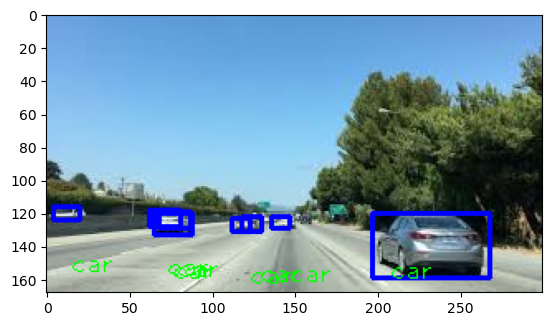

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [18]:
# Open video file or capture device
cap = cv2.VideoCapture('demo_video.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)  # Use webcam if video fails to open
if not cap.isOpened():
    raise IOError("Can't open the video")

# Set font parameters
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Frame resizing parameters
frame_width = 640  # Desired width
frame_height = 480  # Desired height

while True:
    ret, frame = cap.read()

    # Resize the frame to avoid zoomed-in effect
    frame = cv2.resize(frame, (frame_width, frame_height), interpolation=cv2.INTER_AREA)

    # Perform object detection (assuming you have a 'model' and 'classLabels' defined)
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    # Check for detected objects
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    # Display the frame
    cv2.imshow('Frame', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
# Open video file or capture device
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)  # Use webcam if video fails to open
if not cap.isOpened():
    raise IOError("Can't open the video")

# Set font parameters
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Frame resizing parameters
frame_width = 640  # Desired width
frame_height = 480  # Desired height

while True:
    ret, frame = cap.read()

    # Resize the frame to avoid zoomed-in effect
    frame = cv2.resize(frame, (frame_width, frame_height), interpolation=cv2.INTER_AREA)

    # Perform object detection (assuming you have a 'model' and 'classLabels' defined)
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    # Check for detected objects
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    # Display the frame
    cv2.imshow('Frame', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
